# Chapter 21 - Binary Classification ML Case Study

In [4]:
# Load supporting libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
import requests
# https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
url = 'https://goo.gl/NXoJfR'
res = requests.get(url, allow_redirects=True)
url_content = res.content
csv_file = open('sonar.all-data.csv','wb')
csv_file.write(url_content)
csv_file.close()

In [18]:
filename = 'sonar.all-data.csv'
dataset = read_csv(filename, header=None)

### Data Summarized

In [19]:
# shape
print(dataset.shape)

(208, 61)


In [24]:
# types
set_option('display.max_rows', 500)
set_option('display.max_columns', 100)
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [25]:
# Head
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0

 We can see that all the values have the same scale, between 0 and 1

In [28]:
# descriptions, change precision to 3 places
set_option('display.precision',3)
print(dataset.describe())

            0          1        2        3        4        5        6   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373   

            7        8        9        10       11       12       13       14  \
count  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.135    0.178    0.208    0.236    0.250    0.273    0.297    0.320   
std      0.085    0.118    0.134    0.133    0.140    0.141    0.164    0.205   
min      

Confirms that these are the same scale but there are different mean values which is what is interesting

In [30]:
# class distributions
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


Mostly 50/50 split with slightly more examples of mines than rocks

### Data Visualized

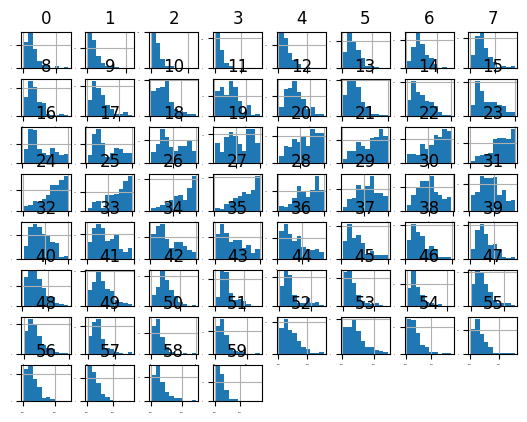

In [33]:
# histograms 
dataset.hist(sharex=False, sharey=False, xlabelsize=0.25, ylabelsize=0.25)
pyplot.show()

We are looking at Gaussian Distributions and perhaps exponential distributions.

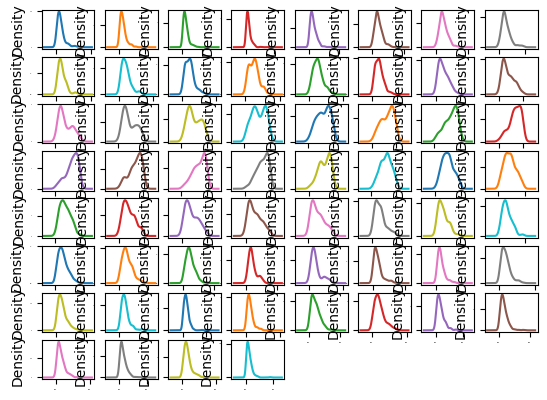

In [36]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()

We are looking are quickly looking for skewedness and we can see a lot. A power transform like Box-Cox transform can correct for skew.

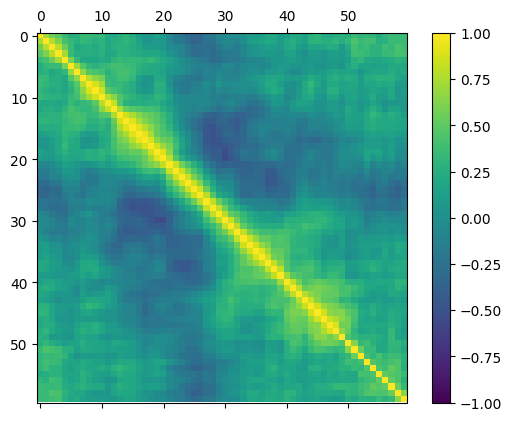

In [49]:
# Correlation Matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.iloc[:,0:60].corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

This is sonar data and the camera angles that are closer to one another seem to be correlated to a similar degree but at a slight degradation.

### Validation Set Split
- create hold-out set for validation at the end

In [55]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60]
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state=seed)

### Evaluate: Baseline

In [51]:
# Prepare test harness and evaluation metric
num_folds = 10 
seed = 7
scoring = 'accuracy'

In [53]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [60]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} {cv_results.std()}"
    print(msg)

LR: 0.7599264705882354 0.09114459238733412
LDA: 0.7786764705882352 0.09357032956228412
KNN: 0.7588235294117647 0.1064171542874719
CART: 0.7275735294117647 0.0828870873381665
NB: 0.6827205882352941 0.13603984459197604
SVM: 0.5658088235294118 0.14132622648463922


LDA has performed the best and with the least variation

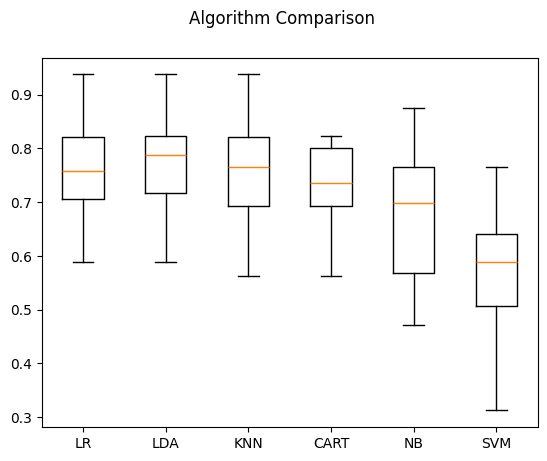

In [61]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


### Evaluate: Stardarized Data
- This is where data is transformed such that each attribute has a mean value of zero
- Pipeline(steps)
- Parameters: steps - list of tuples

List of (name of step, estimator) tuples that are to be chained in sequential order. To be compatible with the scikit-learn API, all steps must define fit. All non-last steps must also define transform

In [63]:
# Standardize the dataset
pipelines =[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier() )])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(gamma='auto'))])))

In [66]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds,random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} {cv_results.std()}"
    print(msg)

ScaledLR: 0.7544117647058824 0.06792621429341761
ScaledLDA: 0.7786764705882352 0.09357032956228412
ScaledKNN: 0.8084558823529411 0.10799628441801545
ScaledCART: 0.7165441176470588 0.09719311676434077
ScaledNB: 0.6827205882352941 0.13603984459197604
ScaledSVM: 0.8261029411764707 0.08181365573488257


SVM has given the best results after the data was scaled followed by KNN

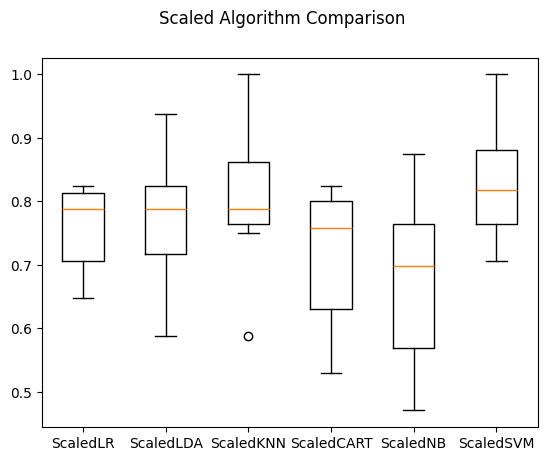

In [69]:
# CompareAlgorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Tuning KNN
- try odd values 1 to 21 for k

In [71]:
# Tune Scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

In [74]:
param_grid

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

In [75]:
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

In [81]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print(f"Best {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with {param}")

Best 0.8360294117647058 using {'n_neighbors': 1}
0.8360294117647058 (0.0794866204928241) with {'n_neighbors': 1}
0.8136029411764707 (0.08802133986497988) with {'n_neighbors': 3}
0.8143382352941178 (0.09686994210481911) with {'n_neighbors': 5}
0.7775735294117647 (0.12038687007377162) with {'n_neighbors': 7}
0.7301470588235294 (0.09937629892951001) with {'n_neighbors': 9}
0.7415441176470589 (0.07397018623443563) with {'n_neighbors': 11}
0.7106617647058824 (0.10582936276143473) with {'n_neighbors': 13}
0.7231617647058823 (0.08098339277187816) with {'n_neighbors': 15}
0.6988970588235295 (0.07266867533836381) with {'n_neighbors': 17}
0.7106617647058824 (0.09133717455131453) with {'n_neighbors': 19}
0.6988970588235295 (0.09119499930327252) with {'n_neighbors': 21}


This is interesting because the algorithm will make predictions useing the most similar instance in the training dataset alone

# Tuning SVM
- We can tune 2 key parameters of SVM algorithm
    - the value of C (how much to relax the margin)
    - the type of kernel
    
- Default C value uses the Radial Basis Function(RBF) kernel with a C values of 1.0

In [129]:
# Tune Scaled SVM
# First create a scaler object that is fit to the X_train data
# Then transform the X_train data with that scaler object
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Layout your chosen values for C parameter
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]

# Layout your chosen kernels
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Create your parameter grid as a dictionary to indicate which set of values are set to which parameters
param_grid = dict(kernel=kernel_values, C=c_values)
param_grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]}

In [130]:
num_folds

10

In [131]:
# Create your model object
model = SVC(gamma='auto')

# Define the number splits by num_folds and define seed 
# This is defined in yout test harness
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Create your grisearch object by inserting your mode, your parameter grid you are testing, 
# the scoring (defined in test harness), and cross validation k-number of folds
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [132]:
# Run your Evalation by fitting it to the rescaledX data and comparing the results to the Y_train
grid_result = grid.fit(rescaledX, Y_train)

In [133]:
# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850735 using {'C': 2.0, 'kernel': 'poly'}
0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.570956 (0.131380) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.656618 (0.104417) with: {'C': 0.3, 'kernel': 'poly'}
0.748162 (0.085295) with: {'C': 0.3, 'kernel': 'rbf'}
0.748897 (0.078423) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704412 (0.110346) with: {'C': 0.5, 'kernel': 'poly'}
0.772426 (0.081837) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.753676 (0.095135) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.766912 (0.072850) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear

We can see that the most performative algorithm is 
- kernel 'poly' and C = 2.0 with a 85.07% accuracy
- better than KNN's 83% accuracy

# Ensemble Methods
- We'll continue look for better results with some ensemble methods 

In [141]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [142]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)

/Users/claytonlouden/machine_learning_mastery/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/claytonlouden/machine_learning_mastery/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/claytonlouden/machine_learning_mastery/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/claytonlouden/machine_learning_mastery/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

AB: 0.7827205882352941 (0.07244513047172835)
GBM: 0.8018382352941178 (0.13190744058097267)
RF: 0.7533088235294118 (0.08322883081328675)
ET: 0.7536764705882353 (0.07295733336238022)


ET has 85.11% which is an improvement

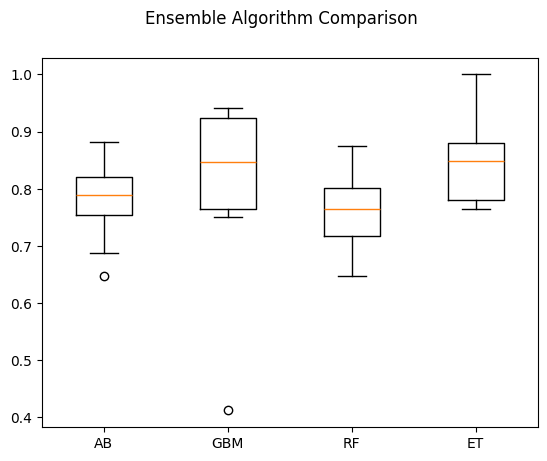

In [114]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# GBM Tuning

- You should start with parameters that have the largest impact first This will give us the order of tuning
- for GBM we will start in this order:
    - max_depth (default 3) and num_samples_split (default 2)
    - min_samples_leaf (default 1)
    - max_features (default None)
    
- We can test Max depth of 5-15 steps in steps of 2
- We will test num_sample_split 200-1000 in steps of 200

In [193]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox').fit(X_train)
poweredX = scaler.transform(X_train)

scaler = StandardScaler().fit(poweredX)
rescaledX = scaler.transform(poweredX)



In [166]:
param_grid = {'max_depth':[x for x in range(1,11,2)], 'min_samples_split':[x for x in range(2,10,2)]}
param_grid

{'max_depth': [1, 3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8]}

In [195]:
param_grid = {'max_depth':[x for x in range(1,11,2)], 'min_samples_split':[x for x in range(2,10,2)]}
model = GradientBoostingClassifier(random_state=7)#, max_features=11, min_samples_leaf=26)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831618 using {'max_depth': 3, 'min_samples_split': 6}
0.795956 (0.101330) with: {'max_depth': 1, 'min_samples_split': 2}
0.795956 (0.101330) with: {'max_depth': 1, 'min_samples_split': 4}
0.795956 (0.101330) with: {'max_depth': 1, 'min_samples_split': 6}
0.795956 (0.101330) with: {'max_depth': 1, 'min_samples_split': 8}
0.808456 (0.150488) with: {'max_depth': 3, 'min_samples_split': 2}
0.795588 (0.144875) with: {'max_depth': 3, 'min_samples_split': 4}
0.831618 (0.098304) with: {'max_depth': 3, 'min_samples_split': 6}
0.807721 (0.129117) with: {'max_depth': 3, 'min_samples_split': 8}
0.746324 (0.127410) with: {'max_depth': 5, 'min_samples_split': 2}
0.764706 (0.110135) with: {'max_depth': 5, 'min_samples_split': 4}
0.723162 (0.111186) with: {'max_depth': 5, 'min_samples_split': 6}
0.758088 (0.136395) with: {'max_depth': 5, 'min_samples_split': 8}
0.757721 (0.088441) with: {'max_depth': 7, 'min_samples_split': 2}
0.763971 (0.090366) with: {'max_depth': 7, 'min_samples_split': 4}


83% with max_depth=3 and min_samples_split = 6

In [169]:
param_grid = {'max_features':[x for x in range(7,20,2)], 'min_samples_leaf':[x for x in range(20,40,2)]}
param_grid

{'max_features': [7, 9, 11, 13, 15, 17, 19],
 'min_samples_leaf': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38]}

In [196]:
param_grid = {'max_features':[x for x in range(7,20,2)], 'min_samples_leaf':[x for x in range(20,40,2)]}

model = GradientBoostingClassifier(max_depth=3, min_samples_split=6, random_state=7) #, max_features=13, min_samples_leaf=7)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.891912 using {'max_features': 11, 'min_samples_leaf': 26}
0.856618 (0.075309) with: {'max_features': 7, 'min_samples_leaf': 20}
0.875000 (0.096433) with: {'max_features': 7, 'min_samples_leaf': 22}
0.844485 (0.095857) with: {'max_features': 7, 'min_samples_leaf': 24}
0.868750 (0.100819) with: {'max_features': 7, 'min_samples_leaf': 26}
0.868750 (0.077539) with: {'max_features': 7, 'min_samples_leaf': 28}
0.862868 (0.094508) with: {'max_features': 7, 'min_samples_leaf': 30}
0.874265 (0.085478) with: {'max_features': 7, 'min_samples_leaf': 32}
0.850368 (0.079416) with: {'max_features': 7, 'min_samples_leaf': 34}
0.844485 (0.088343) with: {'max_features': 7, 'min_samples_leaf': 36}
0.862868 (0.095447) with: {'max_features': 7, 'min_samples_leaf': 38}
0.838235 (0.096166) with: {'max_features': 9, 'min_samples_leaf': 20}
0.844485 (0.075095) with: {'max_features': 9, 'min_samples_leaf': 22}
0.861765 (0.059853) with: {'max_features': 9, 'min_samples_leaf': 24}
0.874265 (0.067367) with

subsample = 1.0,
n_estimators = 100


In [ ]:
{'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
'n_estimators':range(20,81,10)

In [177]:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0], 'n_estimators':[x for x in range(70,120,10)]}
param_grid

{'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0],
 'n_estimators': [70, 80, 90, 100, 110]}

In [197]:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0], 'n_estimators':[x for x in range(70,120,10)]}

model = GradientBoostingClassifier(max_depth=3, min_samples_split=6, random_state=7, max_features=11, min_samples_leaf= 26) #, max_features=13, min_samples_leaf=7)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892279 using {'n_estimators': 80, 'subsample': 1.0}
0.815441 (0.123540) with: {'n_estimators': 70, 'subsample': 0.6}
0.802574 (0.086924) with: {'n_estimators': 70, 'subsample': 0.7}
0.856250 (0.107670) with: {'n_estimators': 70, 'subsample': 0.75}
0.831985 (0.074171) with: {'n_estimators': 70, 'subsample': 0.8}
0.868382 (0.062322) with: {'n_estimators': 70, 'subsample': 0.85}
0.850735 (0.078701) with: {'n_estimators': 70, 'subsample': 0.9}
0.862868 (0.087898) with: {'n_estimators': 70, 'subsample': 1.0}
0.827574 (0.126488) with: {'n_estimators': 80, 'subsample': 0.6}
0.808088 (0.077656) with: {'n_estimators': 80, 'subsample': 0.7}
0.868750 (0.105047) with: {'n_estimators': 80, 'subsample': 0.75}
0.831985 (0.074171) with: {'n_estimators': 80, 'subsample': 0.8}
0.868015 (0.062618) with: {'n_estimators': 80, 'subsample': 0.85}
0.856618 (0.069290) with: {'n_estimators': 80, 'subsample': 0.9}
0.892279 (0.064815) with: {'n_estimators': 80, 'subsample': 1.0}
0.845221 (0.094714) with: 

The best we get so far by tuning 6 parameters and 2 data transforms is 89.2%

In [ ]:
model = GradientBoostingClassifier(max_depth=3, min_samples_split=6, random_state=7, max_features=11, min_samples_leaf= 26, n_estimators= 80, subsample=1.0)
                                   

# ET Tuning

In [205]:
param_grid = {'max_depth':[x for x in range(1,11,2)], 'min_samples_split':[x for x in range(2,10,2)]}


model = ExtraTreesClassifier(random_state=7) 
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880515 using {'max_depth': 9, 'min_samples_split': 2}
0.681618 (0.096897) with: {'max_depth': 1, 'min_samples_split': 2}
0.681618 (0.096897) with: {'max_depth': 1, 'min_samples_split': 4}
0.681618 (0.096897) with: {'max_depth': 1, 'min_samples_split': 6}
0.681618 (0.096897) with: {'max_depth': 1, 'min_samples_split': 8}
0.778676 (0.133904) with: {'max_depth': 3, 'min_samples_split': 2}
0.778676 (0.133904) with: {'max_depth': 3, 'min_samples_split': 4}
0.784559 (0.129203) with: {'max_depth': 3, 'min_samples_split': 6}
0.778676 (0.123135) with: {'max_depth': 3, 'min_samples_split': 8}
0.820588 (0.082254) with: {'max_depth': 5, 'min_samples_split': 2}
0.820221 (0.077946) with: {'max_depth': 5, 'min_samples_split': 4}
0.802206 (0.091732) with: {'max_depth': 5, 'min_samples_split': 6}
0.820956 (0.089770) with: {'max_depth': 5, 'min_samples_split': 8}
0.874632 (0.054169) with: {'max_depth': 7, 'min_samples_split': 2}
0.832353 (0.072272) with: {'max_depth': 7, 'min_samples_split': 4}


In [206]:
param_grid = {'max_features':[x for x in range(7,20,2)], 'min_samples_leaf':[x for x in range(20,40,2)]}


model = ExtraTreesClassifier(random_state=7, max_depth=9, min_samples_split=2) 
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795588 using {'max_features': 11, 'min_samples_leaf': 26}
0.777941 (0.123982) with: {'max_features': 7, 'min_samples_leaf': 20}
0.771691 (0.111506) with: {'max_features': 7, 'min_samples_leaf': 22}
0.754044 (0.105181) with: {'max_features': 7, 'min_samples_leaf': 24}
0.741544 (0.104919) with: {'max_features': 7, 'min_samples_leaf': 26}
0.734926 (0.096411) with: {'max_features': 7, 'min_samples_leaf': 28}
0.722426 (0.105384) with: {'max_features': 7, 'min_samples_leaf': 30}
0.716544 (0.107758) with: {'max_features': 7, 'min_samples_leaf': 32}
0.710662 (0.112875) with: {'max_features': 7, 'min_samples_leaf': 34}
0.679779 (0.115144) with: {'max_features': 7, 'min_samples_leaf': 36}
0.686029 (0.113688) with: {'max_features': 7, 'min_samples_leaf': 38}
0.790441 (0.086127) with: {'max_features': 9, 'min_samples_leaf': 20}
0.790441 (0.097437) with: {'max_features': 9, 'min_samples_leaf': 22}
0.766544 (0.087763) with: {'max_features': 9, 'min_samples_leaf': 24}
0.772059 (0.089709) with

In [209]:
param_grid = {"n_estimators":[25,50,100,250,500,750,800,850,900,950]}

#param_grid = {'min_samples_split': [2, 5, 10, 15, 20],'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

model = ExtraTreesClassifier(random_state=7, max_depth=9) 
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880515 using {'n_estimators': 100}
0.826103 (0.060479) with: {'n_estimators': 25}
0.856618 (0.082929) with: {'n_estimators': 50}
0.880515 (0.074175) with: {'n_estimators': 100}
0.868015 (0.064719) with: {'n_estimators': 250}
0.874265 (0.067367) with: {'n_estimators': 500}
0.874265 (0.067367) with: {'n_estimators': 750}
0.874265 (0.067367) with: {'n_estimators': 800}
0.874265 (0.067367) with: {'n_estimators': 850}
0.874265 (0.067367) with: {'n_estimators': 900}
0.874265 (0.067367) with: {'n_estimators': 950}


In [210]:
param_grid = {
    'bootstrap': [True, False]
}

model = ExtraTreesClassifier(random_state=7, max_depth=9, n_estimators = 100) 
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880515 using {'bootstrap': False}
0.855515 (0.062111) with: {'bootstrap': True}
0.880515 (0.074175) with: {'bootstrap': False}


88% with ET and 89.2% with GBM

# Finalize Model 

In [214]:
# prepare the model
power = PowerTransformer(method='box-cox').fit(X_train)
poweredX = scaler.transform(X_train)

scaler = StandardScaler().fit(poweredX)
rescaledX = scaler.transform(poweredX)

model = GradientBoostingClassifier(max_depth=3, 
                                   min_samples_split=6, 
                                   random_state=7,
                                   max_features=11, 
                                   min_samples_leaf= 26, 
                                   n_estimators= 80, 
                                   subsample=1.0)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8809523809523809
[[23  4]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.85      0.90        27
           R       0.78      0.93      0.85        15

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42

